<a href="https://colab.research.google.com/github/gauravcr7rm/Emotion-detection-using-audio-signals/blob/main/LSTM_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import CuDNNLSTM, Dense, Dropout, LSTM, Flatten
from keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler

In [ ]:
import os
import pandas as pd
import numpy as np
os.chdir('/content/drive/My Drive/spectroimage_folder')
! ls

 data_creator_2.ipynb   x_test_eight.pkl    y_test_4.pkl
 data_creator.ipynb     x_test_new.pkl	    y_test_5.pkl
 Disgust	        x_test.pkl	    y_test_eight.pkl
 Fear		        x_test_three.pkl    y_test_new.pkl
'image folder'	        x_test_two.pkl	    y_test.pkl
 Joy		        x_train_2.pkl	    y_test_three.pkl
 Neutral	        x_train_3.pkl	    y_test_two.pkl
 pickle_folder	        x_train_4.pkl	    y_train_2.pkl
 Sadness	        x_train_5.pkl	    y_train_3.pkl
 Surprise	        x_train_eight.pkl   y_train_4.pkl
 test_sent_emo.csv      x_train_new.pkl     y_train_5.pkl
'Untitled Folder'       x_train.pkl	    y_train_eight.pkl
 x_test_2.pkl	        x_train_three.pkl   y_train_new.pkl
 x_test_3.pkl	        x_train_two.pkl     y_train.pkl
 x_test_4.pkl	        y_test_2.pkl	    y_train_three.pkl
 x_test_5.pkl	        y_test_3.pkl	    y_train_two.pkl


In [ ]:
import pickle 
X_train = pickle.load(open('/content/drive/My Drive/spectroimage_folder/x_train_two.pkl','rb'))
X_test = pickle.load(open('/content/drive/My Drive/spectroimage_folder/x_test_two.pkl','rb'))
Y_train = pickle.load(open('/content/drive/My Drive/spectroimage_folder/y_train_two.pkl','rb'))
Y_test = pickle.load(open('/content/drive/My Drive/spectroimage_folder/y_test_two.pkl','rb'))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
Y_train = pickle.load(open('/gdrive/My Drive/spectroimage_folder/y_train.pkl','rb'))

In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)
Y_train.shape

(2311, 1)

In [ ]:
print(np.unique(Y_test))

[1 2 3 4 5 6 7]


In [ ]:
y = np.zeros(2311)
for i in range(2311):
  y[i] = Y_train[i][0]

In [ ]:
y.shape

In [ ]:
for i in range(2311):
  Y_train[i] = Y_train[i]-1
  #counts[Y_train[i][0]] = counts[Y_train[i][0]] + 1
for i in range(284):
  Y_test[i] = Y_test[i]-1
  #counts[Y_train[i][0]] = counts[Y_train[i][0]] + 1

In [ ]:
#weights = {0:100, 1:100, 2:200, 3:150, 4:10, 5:400, 6:400}
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y),
                                                 y)

In [ ]:
class_weights

In [ ]:
from keras.utils import to_categorical
y_train, y_test = to_categorical(Y_train), to_categorical(Y_test)
y_train.shape

(2311, 7)

In [ ]:
#y_train.shape, X_test.shape
class_weights

array([0.92736758, 1.07189239, 1.69304029, 1.3530445 , 0.30040296,
       7.02431611, 5.32488479])

In [ ]:
label_dicts = {0:0.92736758, 1:1.07189239, 2:1.69304029, 3:1.3530445, 4:0.30040296, 5:7.02431611, 6:5.32488479}

In [ ]:
import math
def create_class_weight(labels_dict,mu=0.15):
    total = np.sum(labels_dict.values())
    keys = labels_dict.keys()
    class_weight = dict()

    for key in keys:
        score = math.log(mu*total/float(labels_dict[key]))
        class_weight[key] = score if score > 1.0 else 1.0

    return class_weight


In [ ]:
class_weis = create_class_weight(label_dicts)

In [ ]:
classifier = Sequential()
classifier.add(LSTM(500, input_shape=(1, 2048), return_sequences=True))
classifier.add(Dropout(0.2))
classifier.add(Dense(64, activation='relu'))
classifier.add(Dropout(0.2))
classifier.add(Dense(7, activation='softmax'))


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=1e-4, decay=1e-6),
              metrics=["accuracy"], class_weights = weights)

In [ ]:
model.fit(X_train, y_train, epochs = 300, validation_split=0.2)

In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential([
  tf.keras.layers.Bidirectional(tf.keras.layers.GRU(300, input_shape=(2,2048),return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.GRU(200, return_sequences = True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(64, activation = 'relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(32, activation = 'relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(7, activation = 'softmax'),
  tf.keras.layers.Flatten()
])

In [ ]:
from keras.layers import Input, LSTM, Dense, TimeDistributed, Masking, Dropout, Bidirectional
from keras.models import Model
input_data = Input(shape=(2,2048))
lstm = Bidirectional(LSTM(300, activation='tanh', return_sequences = True, dropout=0.6))(input_data)
lstm2 = Bidirectional(LSTM(200, activation='tanh', return_sequences = True, dropout=0.6))(lstm)
lstm3 = Bidirectional(LSTM(300, activation='tanh', dropout=0.6))(lstm2)
inter = Dropout(0.9)(lstm3)
inter1 = Dense(100,activation='tanh')(inter)
inter = Dropout(0.9)(inter1)
output = Dense(7,activation='softmax')(inter)
model1 = Model(input_data, output)
aux = Model(input_data, inter1)


In [ ]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 10))
optimizer = tf.keras.optimizers.Adam( lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model1.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=["accuracy"])
#model.summary()
history = model1.fit(X_train, y_train,epochs = 200, class_weight = label_dicts, validation_split = 0.2)

Train on 1848 samples, validate on 463 samples
Epoch 1/200
1848/1848 [==============================] - 14s 7ms/step - loss: 2.2136 - accuracy: 0.1640 - val_loss: 1.8953 - val_accuracy: 0.1123
Epoch 2/200
1848/1848 [==============================] - 10s 5ms/step - loss: 2.1243 - accuracy: 0.1456 - val_loss: 1.8946 - val_accuracy: 0.1123
Epoch 3/200
1848/1848 [==============================] - 10s 5ms/step - loss: 2.0969 - accuracy: 0.1694 - val_loss: 1.8953 - val_accuracy: 0.1123
Epoch 4/200
1848/1848 [==============================] - 10s 5ms/step - loss: 2.0881 - accuracy: 0.1553 - val_loss: 1.8950 - val_accuracy: 0.1145
Epoch 5/200
1848/1848 [==============================] - 10s 5ms/step - loss: 2.1160 - accuracy: 0.1466 - val_loss: 1.8950 - val_accuracy: 0.1210
Epoch 6/200
1848/1848 [==============================] - 9s 5ms/step - loss: 2.0925 - accuracy: 0.1602 - val_loss: 1.8959 - val_accuracy: 0.1123
Epoch 7/200
1848/1848 [==============================] - 10s 5ms/step - loss: 

(1e-08, 100.0, 1.0, 14000.0)

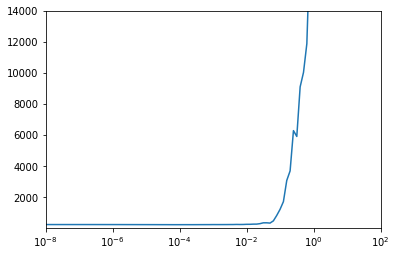

In [ ]:
import matplotlib.pyplot as plt
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 100, 1, 14000])

In [ ]:
optimizer = tf.keras.optimizers.Adam(lr=5e-3, decay=1e-6)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(X_train, y_train,epochs=100, callbacks=[lr_schedule])

In [ ]:
 classifier.compile( loss='categorical_crossentropy',
               optimizer=Adam(lr=0.001, decay=1e-6),
               metrics=['accuracy'] )

In [ ]:
classifier.fit(X_train,y_train,
           epochs=100,
           validation_split = 0.2)

In [ ]:
score, acc = model.evaluate(X_test, y_test, verbose = 1)

9/9 [==============================] - 0s 26ms/step - loss: 3.6161 - accuracy: 0.4049


In [ ]:
pred = model.predict(X_test)

In [ ]:
acc

0.16108787059783936

In [ ]:
tot_sum = 0
for i in range(478):
  tot_sum += np.sum((pred[i]==y_test[i])*1)
print(tot_sum)


0


In [ ]:
classes = [0]*7
predi = [0]*7
import numpy as np
valid = 0
for i in range(284):
  result = np.where(pred[i] == np.amax(pred[i]))
  for j in range(7):
    if y_test[i][j] == 1:
      result2 = j
      break
  if result[0] == result2:
    valid = valid + 1
    predi[result2] = predi[result2]+1
  classes[result2] = classes[result2] + 1

print(classes,predi)



[43, 34, 13, 35, 150, 3, 6] [3, 3, 0, 0, 109, 0, 0]


In [ ]:
import numpy as np
valid = 0
for i in range(284):
  result = np.where(pred[i] == np.amax(pred[i]))
  for j in range(7):
    if y_test[i][j] == 1:
      result2 = j
      break
  if result[0] == result2:
    valid = valid + 1
  print(result[0],result2)


In [ ]:
accu = [0]*7
for i in range(7):
  accu[i] = (predi[i]/classes[i])*100
print(accu)

[6.976744186046512, 8.823529411764707, 0.0, 0.0, 72.66666666666667, 0.0, 0.0]


In [ ]:
pred = np.argmax(pred, axis=1) ## shape = (batch_size, 35)
pred.shape

(478,)

## Sequence Classifier

In [ ]:
from keras import backend as K
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Dense, LSTM, CuDNNLSTM, Embedding, Bidirectional, Conv1D, MaxPooling1D, Flatten, concatenate, Dropout, Average, Activation, Lambda, TimeDistributed
from keras.callbacks import ModelCheckpoint, TensorBoard, Callback
from keras.optimizers import Adam

In [ ]:
weights = {0:56, 1:158, 2:214 , 3:317 , 4:258 , 5:39 , 6:985 , 7:773}

In [ ]:
def weightedLoss(originalLossFunc, weightsList):

    def lossFunc(true, pred):

        axis = -1 #if channels last 
        #axis=  1 #if channels first


        #argmax returns the index of the element with the greatest value
        #done in the class axis, it returns the class index    
        classSelectors = K.argmax(true, axis=axis) 
            #if your loss is sparse, use only true as classSelectors

        #considering weights are ordered by class, for each class
        #true(1) if the class index is equal to the weight index   
        classSelectors = [K.equal(i, classSelectors) for i in range(len(weightsList))]

        #casting boolean to float for calculations  
        #each tensor in the list contains 1 where ground true class is equal to its index 
        #if you sum all these, you will get a tensor full of ones. 
        classSelectors = [K.cast(x, K.floatx()) for x in classSelectors]

        #for each of the selections above, multiply their respective weight
        weights = [sel * w for sel,w in zip(classSelectors, weightsList)] 

        #sums all the selections
        #result is a tensor with the respective weight for each element in predictions
        weightMultiplier = weights[0]
        for i in range(1, len(weights)):
            weightMultiplier = weightMultiplier + weights[i]


        #make sure your originalLossFunc only collapses the class axis
        #you need the other axes intact to multiply the weights tensor
        loss = originalLossFunc(true,pred) 
        loss = loss * weightMultiplier

        return loss
    return lossFunc

In [ ]:
K.clear_session()
x =  Input(shape=(10, 2048), dtype='float32')
lstm1 = LSTM(32, return_sequences=True)
drop = Dropout(0.2)
l0 = TimeDistributed(Dense(8, activation='softmax'))

x1 = lstm1(x)
x1 = drop(x1)
x1 = l0(x1)
model = Model(x, x1)
  
model.summary()
model.compile(optimizer = Adam(learning_rate=1e-5), 
                loss= weightedLoss(keras.losses.categorical_crossentropy, weights), 
                metrics=["accuracy"])



In [ ]:
model.fit(X_train, y_train, epochs = 500
          , verbose = 1, validation_split = 0.2, class_weight = weights)

ValueError: ignored

In [ ]:
pred = model.predict(X_test) ## shape = (batch_size, 35, 8)
pred = np.argmax(pred, axis=2) ## shape = (batch_size, 35)
pred.shape

(30, 5)

In [ ]:
score, acc = model.evaluate(X_test, y_test)

30/30 [==============================] - 0s 194us/step


In [ ]:
print(score)

1.3741798400878906


In [ ]:
i, j = 10, 10
pred[i,j], Y_test[i,j]

IndexError: ignored

In [ ]:
np.sum((pred==Y_test)*1)

86

In [ ]:
pred[2]

array([5, 5, 5, 5, 5])

In [ ]:
86/(30*5)

0.5733333333333334